# MAST30034 Applied Data Science Project 1 Visualisation

Student Name: Haonan Zhong

Student ID: 867492

In [1]:
import geopandas as gpd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import contextily as ctx
import warnings
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

warnings.filterwarnings("ignore")

In [2]:
yellow_winter = pd.read_feather('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/preprocessed_data/cleaned_winter.feather').drop('index', axis=1)
yellow_summer = pd.read_feather('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/preprocessed_data/cleaned_summer.feather').drop('index', axis=1)

In [3]:
sf = gpd.read_file('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/raw_data/taxi_zones/taxi_zones.shp')
sf['geometry'] = sf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
sf

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


# How does time and day affect the usage of taxi?

In [4]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
winter_pu_count = pd.crosstab(yellow_winter['weekday'], yellow_winter['time'])
winter_pu_count = winter_pu_count.reindex(cats, axis=0)

summer_pu_count = pd.crosstab(yellow_summer['weekday'], yellow_summer['time'])
summer_pu_count = summer_pu_count.reindex(cats, axis=0)
summer_pu_count

time,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,34362,19746,12628,8719,10005,21013,56960,85988,108680,106235,...,105751,106318,102429,120051,141118,129483,115090,110365,95930,65292
Tuesday,40723,22803,13294,9164,9381,20349,58694,91791,116280,112948,...,120152,118937,107669,127280,145854,140800,126840,129318,117958,87595
Wednesday,53675,32270,20553,13417,11467,19743,57078,89138,111162,108956,...,112439,109065,102754,122295,144997,141162,133502,135475,129137,100970
Thursday,60474,33451,20353,13124,11780,20816,57724,91567,116273,112685,...,114721,110597,101396,119454,141464,137342,129601,136958,129034,107724
Friday,76384,48803,31611,21040,15740,21239,54245,80723,104455,102636,...,114119,110149,100954,118033,131880,128334,109023,109660,114040,109874
Saturday,90685,76380,63290,45145,27294,13971,21472,30058,43728,61625,...,87680,89953,91450,97375,102199,104811,89003,89373,92563,91336
Sunday,97890,81479,68055,51150,32391,14221,17630,25546,37945,58158,...,100022,97545,95842,102540,106721,95944,89226,84636,73194,55807


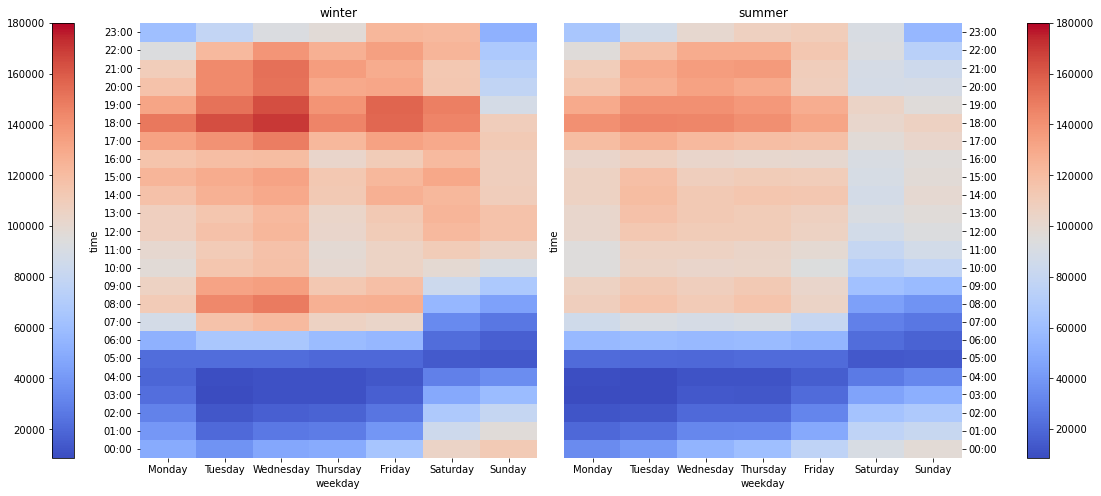

In [5]:
fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(20, 8))
fig.subplots_adjust(wspace=0.05)
day_hour_winter = sns.heatmap(winter_pu_count.transpose(), ax=ax, cmap="coolwarm", vmax=180000, cbar=False)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.12)
day_hour_summer = sns.heatmap(summer_pu_count.transpose(), ax=ax2, cmap="coolwarm", vmax=180000, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.12)
day_hour_winter.invert_yaxis()
day_hour_summer.invert_yaxis()
ax.set_title('winter')
ax2.set_title('summer')
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

In [6]:
def f(row):
    if (row >= "06:00") & (row <= "18:00"):
        val = "day"
    else:
        val = "night"
    return val

yellow_winter['time_desc'] = yellow_winter['time'].apply(f)
yellow_summer['time_desc'] = yellow_summer['time'].apply(f)

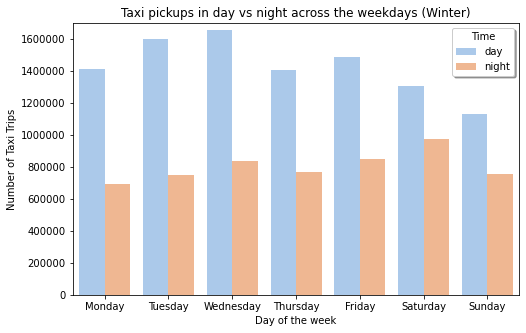

In [7]:
wt = pd.crosstab(yellow_winter['weekday'], yellow_winter['time_desc']).reindex(cats, axis=0)
stacked_winter = wt.stack().reset_index().rename(columns={0:'pick_ups'})

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=stacked_winter.weekday, y=stacked_winter.pick_ups, hue=stacked_winter.time_desc, ax=ax, palette = 'pastel')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Day of the week')
ax.legend(title='Time', shadow=True)
ax.set_title('Taxi pickups in day vs night across the weekdays (Winter)')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 1700000)
plt.show()

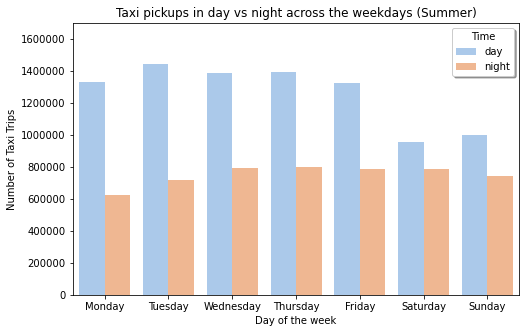

In [8]:
sm = pd.crosstab(yellow_summer['weekday'], yellow_summer['time_desc']).reindex(cats, axis=0)
stacked_summer = sm.stack().reset_index().rename(columns={0:'pick_ups'})

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=stacked_summer.weekday, y=stacked_summer.pick_ups, hue=stacked_summer.time_desc, ax=ax, palette = 'pastel', )
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Day of the week')
ax.legend(title='Time', shadow=True)
ax.set_title('Taxi pickups in day vs night across the weekdays (Summer)')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 1700000)
plt.show()

# What is passenger's tipping behaviour？

In [9]:
# filter payment type cash, since tips are not recorded in cash payment
tip_winter = yellow_winter[yellow_winter['payment_type'] != 2]
tip_summer = yellow_summer[yellow_summer['payment_type'] != 2]

In [10]:
tip_avg_winter = tip_winter.groupby('time')['tip_amount'].agg(['sum','count'])
tip_avg_summer = tip_summer.groupby('time')['tip_amount'].agg(['sum','count'])
tip_avg_winter['avg'] = tip_avg_winter['sum']/tip_avg_winter['count']
tip_avg_summer['avg'] = tip_avg_summer['sum']/tip_avg_summer['count']

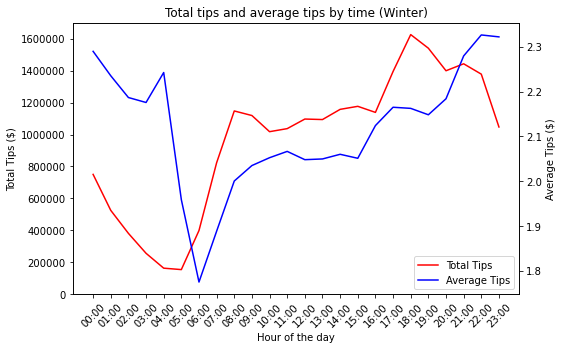

In [11]:
fig, ax = plt.subplots(figsize=(8,5), sharex=True)
ax2 = ax.twinx()
total = ax.plot(tip_avg_winter['sum'], color='r', label='Total Tips')
avg = ax2.plot(tip_avg_winter['avg'], color='b', label='Average Tips')
ax.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(list(tip_avg_winter.index), rotation=45)
ax.set_xlabel('Hour of the day')
ax.set_ylabel("Total Tips ($)")
ax.set_ylim([0, 1700000])
ax.set_title('Total tips and average tips by time (Winter)')
ax2.set_ylabel('Average Tips ($)')
ax.legend(total+avg, ['Total Tips', 'Average Tips'], loc=4)
plt.show()

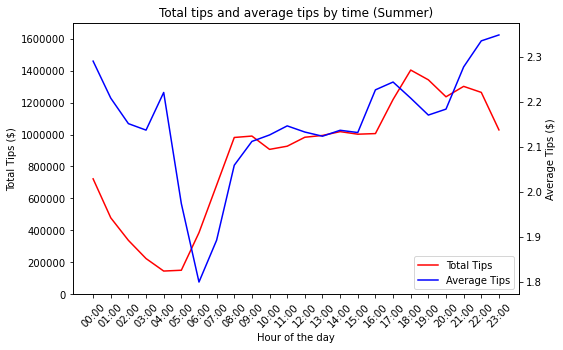

In [12]:
fig, ax = plt.subplots(figsize=(8,5), sharex=True)
ax2 = ax.twinx()
total = ax.plot(tip_avg_summer['sum'], color='r', label='Total Tips',)
avg = ax2.plot(tip_avg_summer['avg'], color='b', label='Average Tips')
ax.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(list(tip_avg_summer.index), rotation=45)
ax.set_xlabel('Hour of the day')
ax.set_ylabel("Total Tips ($)")
ax.set_ylim([0, 1700000])
ax.set_title('Total tips and average tips by time (Summer)')
ax2.set_ylabel('Average Tips ($)')
ax.legend(total+avg, ['Total Tips', 'Average Tips'], loc=4)
plt.show()

In [13]:
tip_region_winter = tip_winter.groupby('PULocationID')['tip_amount'].sum()/tip_winter['PULocationID'].value_counts().sort_index()
tip_region_winter = pd.DataFrame({'LocationID':tip_region_winter.index, 'tip_region':tip_region_winter})
gdf_winter = gpd.GeoDataFrame(pd.merge(tip_region_winter, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID',axis=1)

IDlist = list(set(sf['OBJECTID']) - set(gdf_winter['OBJECTID']))
missing_winter = sf[sf['OBJECTID'].isin(IDlist)]
missing_winter.insert(0, 'tip_region', 0, True)
missing_winter = missing_winter.drop('LocationID', axis=1)
gdf_winter = pd.concat([gdf_winter, missing_winter])
top_10_winter = gdf_winter.sort_values('tip_region', ascending=False)[:10]
gdf_winter = gdf_winter.to_crs(epsg=3857)

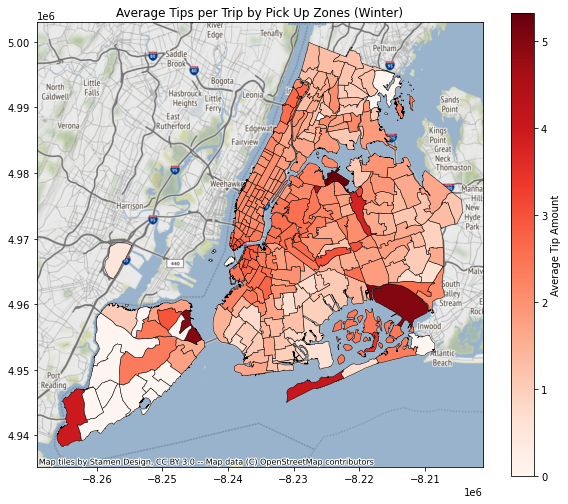

In [14]:
variable = 'tip_region'
vmin, vmax = 0, gdf_winter['tip_region'].max()
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title("Average Tips per Trip by Pick Up Zones (Winter)")
smap = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
gdf_winter.plot(column=variable, cmap='Reds', linewidth=0.5, ax=ax, edgecolor='k',
    legend=True, legend_kwds={'label': "Average Tip Amount", 'shrink': 0.85})
ctx.add_basemap(ax)
plt.show()

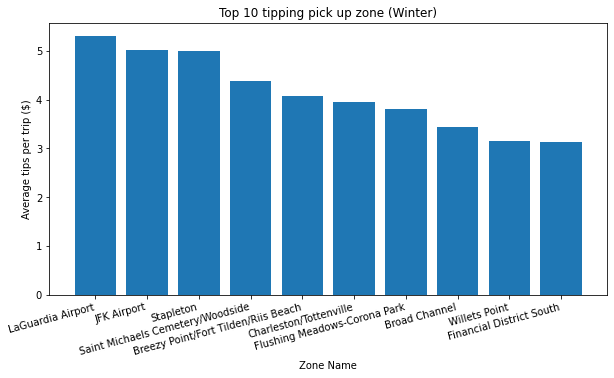

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(top_10_winter['zone'], top_10_winter['tip_region'])
ax.set_title('Top 10 tipping pick up zone (Winter)')
ax.set_xlabel('Zone Name')
ax.set_ylabel('Average tips per trip ($)')
plt.xticks(rotation=15,horizontalalignment="right")
plt.show()

In [16]:
tip_region_summer = tip_summer.groupby('PULocationID')['tip_amount'].sum()/tip_summer['PULocationID'].value_counts().sort_index()
tip_region_summer = pd.DataFrame({'LocationID':tip_region_summer.index, 'tip_region':tip_region_summer})
gdf_summer = gpd.GeoDataFrame(pd.merge(tip_region_summer, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID',axis=1)

IDlist = list(set(sf['OBJECTID']) - set(gdf_summer['OBJECTID']))
missing_summer = sf[sf['OBJECTID'].isin(IDlist)]
missing_summer.insert(0, 'tip_region', 0, True)
missing_summer = missing_summer.drop('LocationID', axis=1)
gdf_summer = pd.concat([gdf_summer, missing_summer])
top_10_summer = gdf_summer.sort_values('tip_region', ascending=False)[:10]
gdf_summer = gdf_summer.to_crs(epsg=3857)

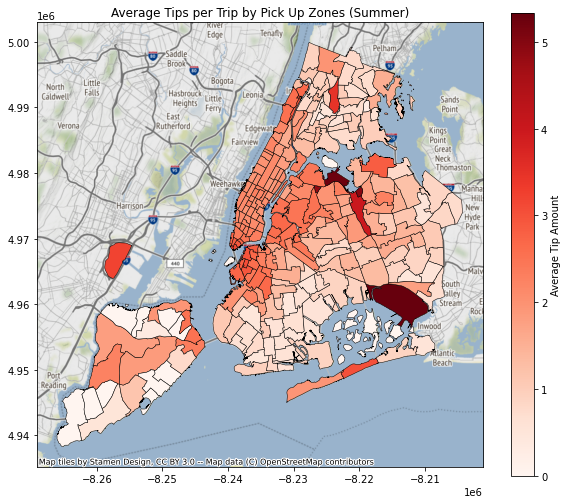

In [17]:
variable = 'tip_region'
vmin, vmax = 0, gdf_summer['tip_region'].max()
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title("Average Tips per Trip by Pick Up Zones (Summer)")
smap = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
gdf_summer.plot(column=variable, cmap='Reds', linewidth=0.5, ax=ax, edgecolor='k',
    legend=True, legend_kwds={'label': "Average Tip Amount", 'shrink': 0.85})
ctx.add_basemap(ax)
plt.show()

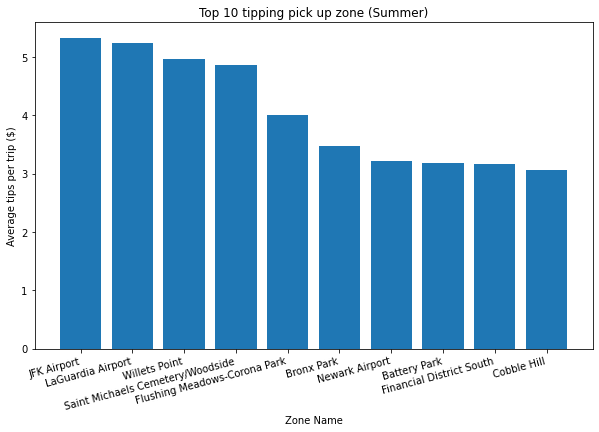

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_summer['zone'], top_10_summer['tip_region'])
ax.set_title('Top 10 tipping pick up zone (Summer)')
ax.set_xlabel('Zone Name')
ax.set_ylabel('Average tips per trip ($)')
plt.xticks(rotation=15,horizontalalignment="right")
plt.show()

# How does weather affect the usage of taxi?

In [19]:
weather = pd.read_feather('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/preprocessed_data/cleaned_weather.feather')
weather['DATE'] = pd.to_datetime(weather['DATE'])
yellow_winter = pd.DataFrame(pd.merge(yellow_winter, weather, left_on='date', right_on='DATE')).drop('date', axis=1)
yellow_summer = pd.DataFrame(pd.merge(yellow_summer, weather, left_on='date', right_on='DATE')).drop('date', axis=1)

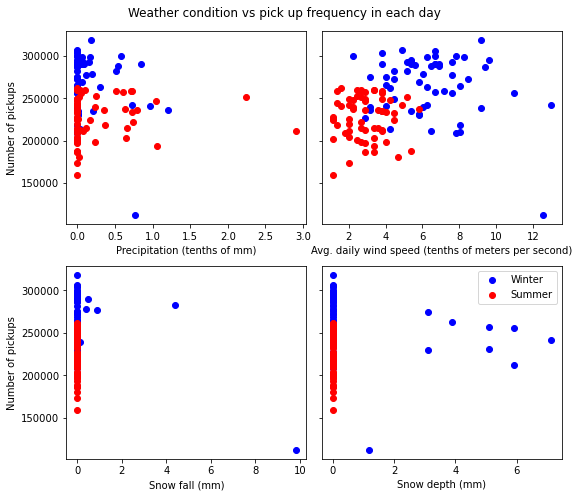

In [21]:
winter_prcp = pd.DataFrame(yellow_winter.groupby(['DATE', 'PRCP']).size()).reset_index()
summer_prcp = pd.DataFrame(yellow_summer.groupby(['DATE', 'PRCP']).size()).reset_index()
winter_prcp.columns = ['Date', 'PRCP', 'pickup_freq']
summer_prcp.columns = ['Date', 'PRCP', 'pickup_freq']

winter_awnd = pd.DataFrame(yellow_winter.groupby(['DATE', 'AWND']).size()).reset_index()
summer_awnd = pd.DataFrame(yellow_summer.groupby(['DATE', 'AWND']).size()).reset_index()
winter_awnd.columns = ['Date', 'AWND', 'pickup_freq']
summer_awnd.columns = ['Date', 'AWND', 'pickup_freq']

winter_snow = pd.DataFrame(yellow_winter.groupby(['DATE', 'SNOW']).size()).reset_index()
summer_snow = pd.DataFrame(yellow_summer.groupby(['DATE', 'SNOW']).size()).reset_index()
winter_snow.columns = ['Date', 'SNOW', 'pickup_freq']
summer_snow.columns = ['Date', 'SNOW', 'pickup_freq']

winter_snwd = pd.DataFrame(yellow_winter.groupby(['DATE', 'SNWD']).size()).reset_index()
summer_snwd = pd.DataFrame(yellow_summer.groupby(['DATE', 'SNWD']).size()).reset_index()
winter_snwd.columns = ['Date', 'SNWD', 'pickup_freq']
summer_snwd.columns = ['Date', 'SNWD', 'pickup_freq']

fig, axs = plt.subplots(2, 2, figsize=(8, 7), sharey=True)
axs[0, 0].scatter(winter_prcp['PRCP'], winter_prcp['pickup_freq'], c='b', label='Winter')
axs[0, 0].scatter(summer_prcp['PRCP'], summer_prcp['pickup_freq'], c='r', label='Summer')
axs[0, 0].set_xlabel('Precipitation (tenths of mm)')
axs[0, 0].set_ylabel('Number of pickups')

axs[0, 1].scatter(winter_awnd['AWND'], winter_awnd['pickup_freq'], c='b', label='Winter')
axs[0, 1].scatter(summer_awnd['AWND'], summer_awnd['pickup_freq'], c='r', label='Summer')
axs[0, 1].set_xlabel('Avg. daily wind speed (tenths of meters per second)')

axs[1, 0].scatter(winter_snow['SNOW'], winter_snow['pickup_freq'], c='b', label='Winter')
axs[1, 0].scatter(summer_snow['SNOW'], summer_snow['pickup_freq'], c='r', label='Summer')
axs[1, 0].set_xlabel('Snow fall (mm)')
axs[1, 0].set_ylabel('Number of pickups')

axs[1, 1].scatter(winter_snwd['SNWD'], winter_snwd['pickup_freq'], c='b', label='Winter')
axs[1, 1].scatter(summer_snwd['SNWD'], summer_snwd['pickup_freq'], c='r', label='Summer')
axs[1, 1].set_xlabel('Snow depth (mm)')
axs[1, 1].legend(loc=1)
plt.suptitle('Weather condition vs pick up frequency in each day')
fig.tight_layout()
plt.show()